In [2]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab


In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/home/weidong/.fastai/data/oxford-iiit-pet/images'),Path('/home/weidong/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
def label_func(f): return f[0].isupper()

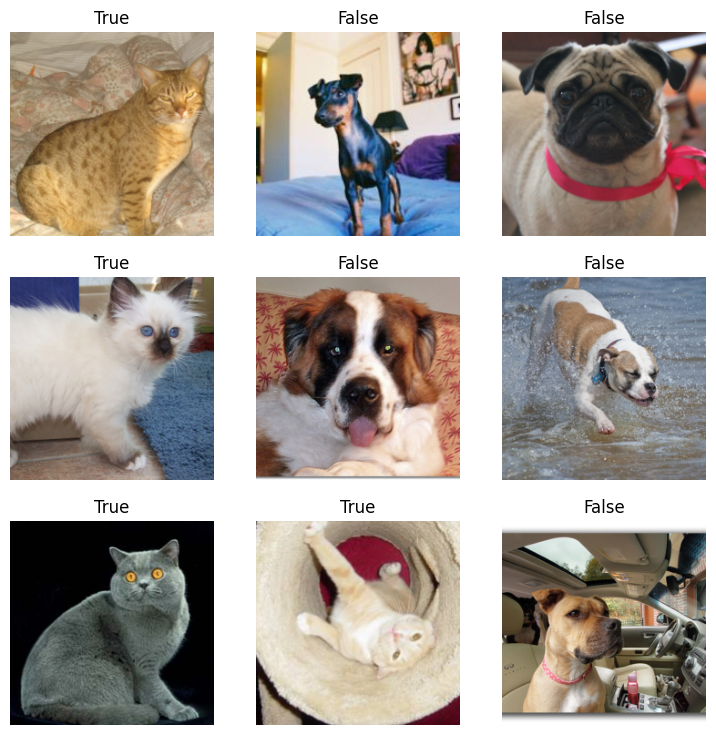

In [6]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/weidong/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 108MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.150001,0.017715,0.004736,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.049016,0.021865,0.010149,00:24


In [11]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9999e-01, 1.4052e-05]))

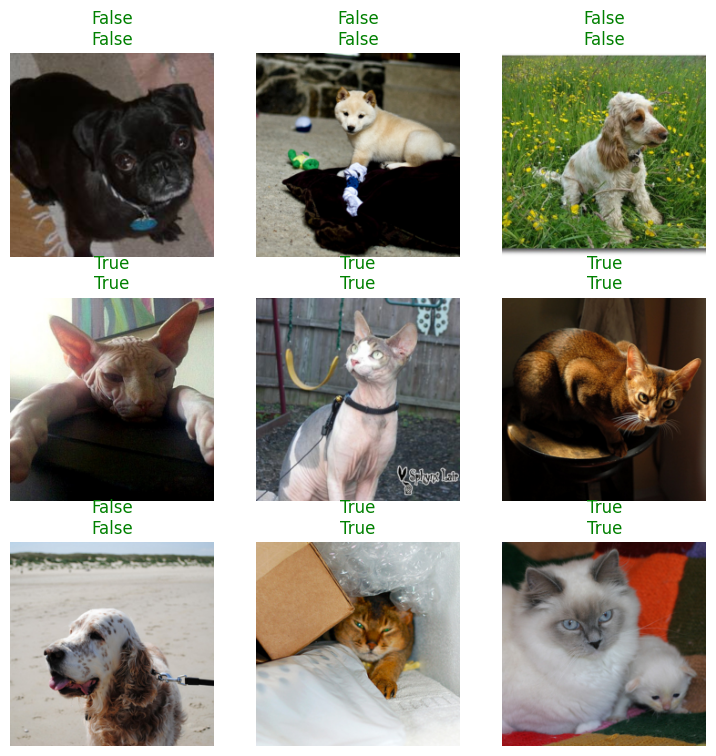

In [12]:
learn.show_results()